In [1]:
import e2e_process
# from kie_gcn import InvoiceGCN
from PIL import Image
from IPython.display import display
import cv2
from orientation_checking import OrientationChecker
from PIL import Image
from IPython.display import display
import time

/home/ubuntu/anaconda3/envs/py39/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
orientationChecker = OrientationChecker( model_path= "./weights/orientation/invoice_rotation_220920.pth")
e2e_OCR_Engine = e2e_process.E2E_OCR_Engine(
    detection_model_path="PaddleOCR/pretrained_models/det_db_inference_221025",
    text_recognition_model_path="./weights/ocr/ocr_221026.pth",
    gcn_state_dict_path="./weights/gcn/GCN_221103_state_dict.pth"
)

running build_ext


Loading codes from weights/nlp/PhoBERT_base_fairseq/bpe.codes ...
Read 64000 codes from the codes file.


In [3]:
import preprocess_img
import cv2
downandLoadImage = preprocess_img.DownAndLoadImage("papaya-fwd-prod-stp")

download time:  4.304970741271973
extracted_line time: 0.05291008949279785
ocr_line time: 1.1473300457000732
make graph:  0.2967240810394287
transform:  0.3440873622894287
Total time: 8.095246315002441


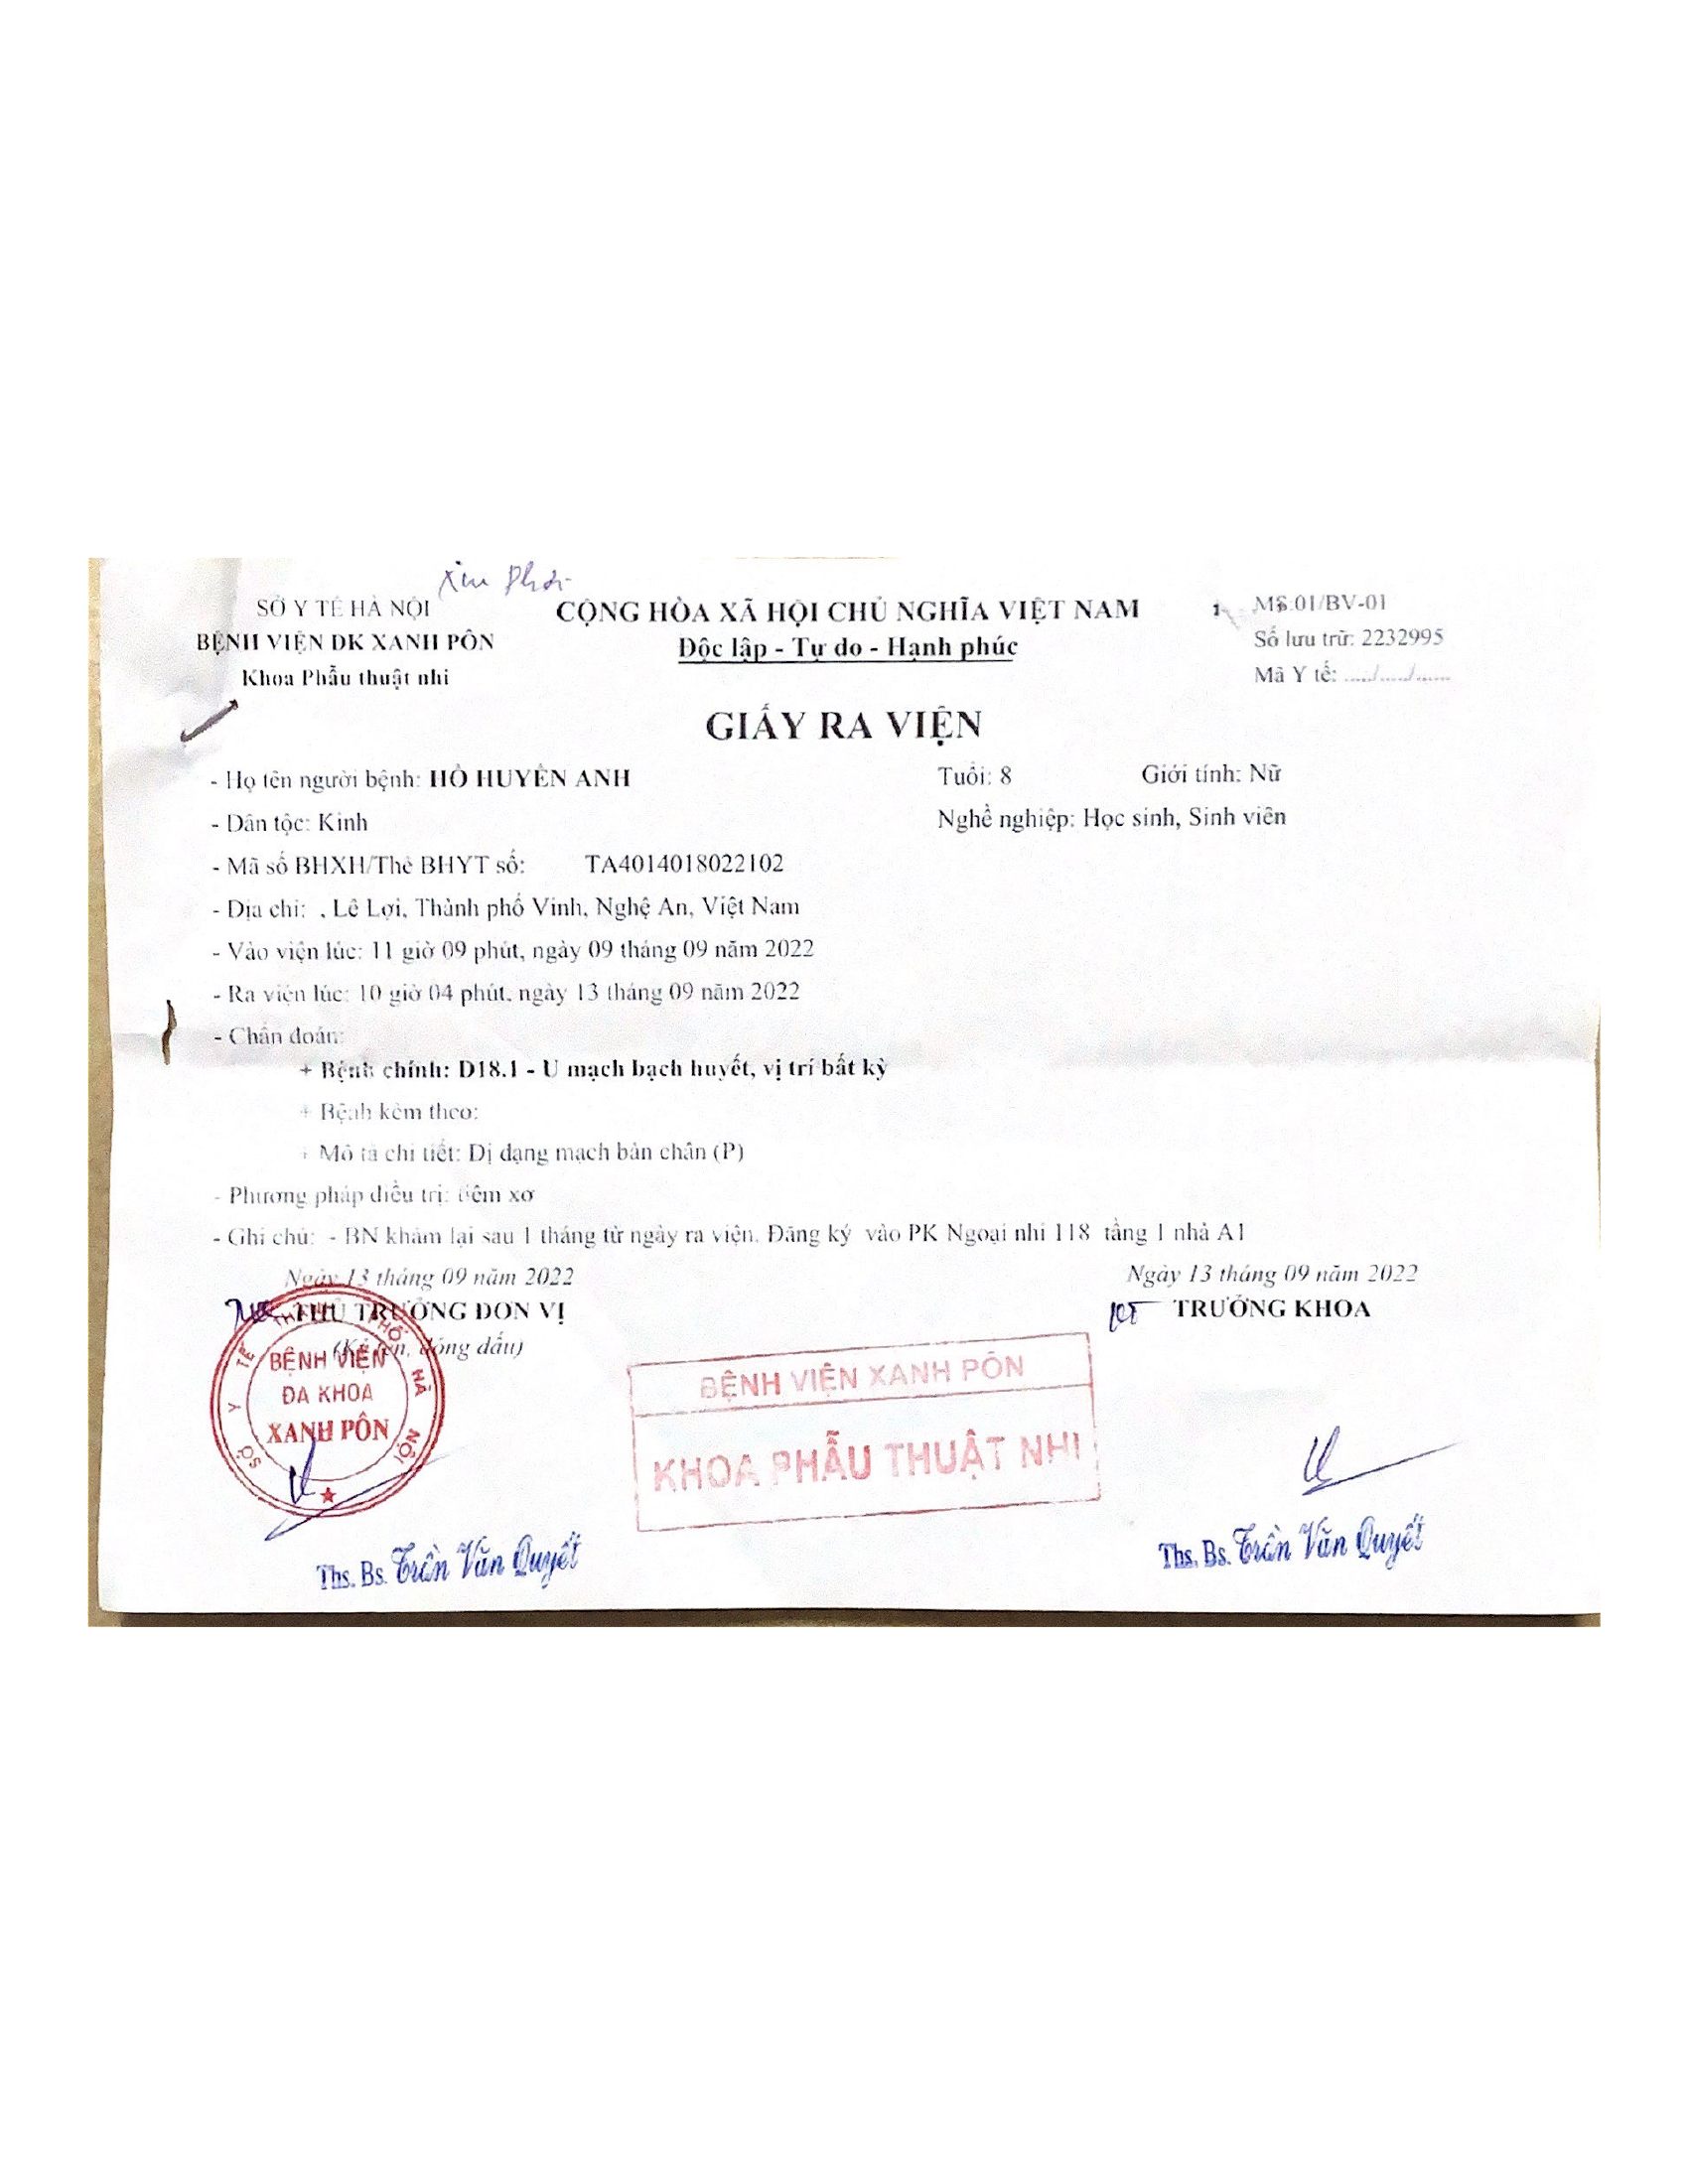

In [4]:
start = time.time()

s_time = time.time()
object_name = "f2a1106c-a3cd-4967-b53e-3f6313b16cf4_HospitalDischargePaper_1666147675.pdf"
image = downandLoadImage(object_name)
print("download time: ", time.time() - s_time)

# img_path = "./imgs_test/273.jpeg"
# image = cv2.imread(img_path)
rotated_img, pred_class = orientationChecker(image)
result, extracted_df = e2e_OCR_Engine(rotated_img)
# print(pred_class, time.time() - start)
print("Total time:", time.time() - start)
display(Image.fromarray(cv2.cvtColor(rotated_img, cv2.COLOR_RGB2BGR)))
# torch.cuda.empty_cache()

In [5]:
result

{'hospital_name': 'BỆNH VIỆN DK XANH PÔN',
 'patient_name': 'HỒ HUYỀN ANH',
 'age': '8',
 'gender': 'Nữ',
 'admissiion_date': '09/09/2022',
 'discharge_date': '13/09/2022',
 'sign_date': ['13/9/2022'],
 'icd-10': ['D18.1']}

In [18]:
extracted_df

,index,xmin,ymin,xmax,ymax,Object,pred_label,confidence_score,polygon
0,0,148,345,257,363,SỞ Y TẾ HÀ NỘI,None,0.541890,"[(148, 345), (257, 345), (257, 364), (148, 364)]"
1,1,257,325,332,348,Xtu p10,None,0.999485,"[(257, 325), (332, 327), (332, 349), (257, 348)]"
2,2,325,345,669,368,CỘNG HÒA XÃ HỘI CHỦ NGHĨA VIỆT NAM,None,0.998294,"[(325, 345), (669, 345), (669, 369), (325, 369)]"
3,3,709,341,815,364,"1, MS 01/BV-01",None,0.918783,"[(709, 345), (814, 341), (815, 360), (710, 365)]"
4,4,114,362,289,385,BỆNH VIỆN DK XANH PÔN,hospital_name,0.998506,"[(114, 362), (289, 362), (289, 386), (114, 386)]"
5,5,396,366,597,388,Độc lập - Tự do - Hạnh phúc,None,0.999998,"[(396, 368), (597, 366), (597, 388), (396, 389)]"
6,6,732,358,847,385,Số lưu trữ: 2232995,None,0.999983,"[(732, 363), (846, 358), (847, 381), (733, 386)]"
7,7,734,384,794,401,Mã Y tế:,None,0.999994,"[(734, 384), (794, 384), (794, 402), (734, 402)]"
8,8,140,386,265,403,Khoa Phẫu thuật nhi,department,0.999904,"[(140, 386), (265, 386), (265, 404), (140, 404)]"
9,9,412,409,577,435,GIẤY RA VIỆN,document_type,0.999688,"[(412, 411), (576, 409), (577, 434), (413, 436)]"


In [ ]:
import postprocess
import importlib
import pandas as pd
importlib.reload(postprocess)
x = postprocess.KiePostProcess()

In [ ]:
gender_text = "Giới tính: Nam"

In [ ]:
x.gender_regularization(gender_text)

In [ ]:
import boto3
import time

s3 = boto3.client('s3')

s_time = time.time()
with open('boto3_temp.jpeg', 'wb') as f:
    s3.download_fileobj('papaya-fwd-prod-stp', '00394ae4-f7c0-43ad-899d-ca073bbd60dc_HospitalDischargePaper_1664927607.jpeg', f)

print("download time: ", time.time() - s_time)

In [ ]:
import preprocess_img
import cv2
downandLoadImage = preprocess_img.DownAndLoadImage("papaya-fwd-prod-stp")

In [ ]:
test_img = downandLoadImage("7c0512a0-6f9e-48f7-ae89-98f480518008_HospitalDischargePaper_1665736542.jpeg")

In [ ]:

cv2.imwrite("test.jpg",test_img)